# 3일차 과제

1. 2014년, 15년에 대한 바차트를 그리시오
1. cctv 소계가 가장 많은 top5 기관명(2014년 기준)
1. 최근 2년동안 cctv 증가율을 구하시오
1. cctv 소계 1000이상은 높음, 미만은 낮음으로 설치 정도 컬럼 추가하시오
1. 2016년 cctv 수가 가장 높은 기관명의 2015년 cctv수, 2014년 cctv 수를 출력하시오
1. 2013년도 이전과 2016년의 cctv 증가율 col을 생성
1. 증가율이 1.2 이상이면 '급증', 1 이상이면 '보통', 그 외엔 '낮음' 컬럼 생성

In [1]:
# precondition to execute all examples on this page

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
matplotlib.rcParams['font.family'] = 'NanumGothicCoding'
matplotlib.rcParams['axes.unicode_minus'] = False
warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv('./CCTV_in_Seoul.csv', encoding='utf-8', index_col='기관명')
df

소계  2013년도 이전  2014년  2015년  2016년
기관명                                       
강남구   2780       1292    430    584    932
강동구    773        379     99    155    377
강북구    748        369    120    138    204
강서구    884        388    258    184     81
관악구   1496        846    260    390    613
광진구    707        573     78     53    174
구로구   1561       1142    173    246    323
금천구   1015        674     51    269    354
노원구   1265        542     57    451    516
도봉구    485        238    159     42    386
동대문구  1294       1070     23    198    579
동작구   1091        544    341    103    314
마포구    574        314    118    169    379
서대문구   962        844     50     68    292
서초구   1930       1406    157    336    398
성동구   1062        730     91    241    265
성북구   1464       1009     78    360    204
송파구    618        529     21     68    463
양천구   2034       1843    142     30    467
영등포구   904        495    214    195    373
용산구   1624       1368    218    112    398
은평구   1873       1138    224    278    468
종로구   1002        464    314    211    630
중구     671        413    190     72    348
중랑구    660        509    121    177    109

### 1) 2014년, 2015년에 대한 바차트를 그리시오

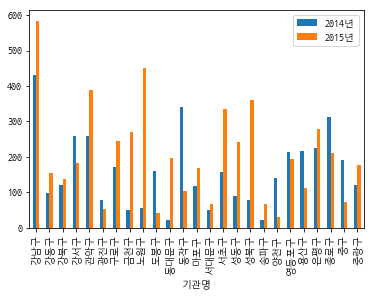

In [6]:
df[['2014년', '2015년']].plot(kind='bar')
plt.show()

### 2) cctv 소계가 가장 많은 top5 기관명 (2014년 기준)

In [12]:
df['2014년'].sort_values(ascending=False).head(5)

기관명
강남구    430
동작구    341
종로구    314
관악구    260
강서구    258
Name: 2014년, dtype: int64

### 3) 최근 2년동안 cctv 증가율을 구하시오

In [55]:

inc2015 = df['2015년'] / df.loc[:, '2013년도 이전':'2014년'].sum(axis=1)
inc2016 = df['2016년'] / df.loc[:, '2013년도 이전':'2015년'].sum(axis=1)
incr = pd.DataFrame([inc2015, inc2016]).T
incr.columns = ['2015년', '2016년']
incr.columns.name='CCTV 증가율'
incr.style.format('{:.2%}')

### 4) cctv 소계 1000이상은 높음, 미만은 낮음으로 설치 정도 컬럼 추가하시오

In [57]:
df['설치 정도'] = df['소계'].apply(lambda v: '높음' if v >= 1000 else '낮음')
df

소계  2013년도 이전  2014년  2015년  2016년 설치 정도
기관명                                             
강남구   2780       1292    430    584    932    높음
강동구    773        379     99    155    377    낮음
강북구    748        369    120    138    204    낮음
강서구    884        388    258    184     81    낮음
관악구   1496        846    260    390    613    높음
광진구    707        573     78     53    174    낮음
구로구   1561       1142    173    246    323    높음
금천구   1015        674     51    269    354    높음
노원구   1265        542     57    451    516    높음
도봉구    485        238    159     42    386    낮음
동대문구  1294       1070     23    198    579    높음
동작구   1091        544    341    103    314    높음
마포구    574        314    118    169    379    낮음
서대문구   962        844     50     68    292    낮음
서초구   1930       1406    157    336    398    높음
성동구   1062        730     91    241    265    높음
성북구   1464       1009     78    360    204    높음
송파구    618        529     21     68    463    낮음
양천구   2034       1843    142     30    467    높음
영등포구   904        495    214    195    373    낮음
용산구   1624       1368    218    112    398    높음
은평구   1873       1138    224    278    468    높음
종로구   1002        464    314    211    630    높음
중구     671        413    190     72    348    낮음
중랑구    660        509    121    177    109    낮음

### 5) 2016년 cctv 수가 가장 높은 기관명의 2014년 cctv수, 2015년 cctv 수를 출력하시오

In [35]:
df[df['2016년']==df['2016년'].max()][['2014년', '2015년']]

2014년  2015년
기관명              
강남구    430    584

### 6) 2013년도 이전과 2016년의 cctv 증가율 col을 생성

In [66]:
df['2013년이후 증가율(%)'] = round(df.loc[:, '2014년':'2016년'].sum(axis=1) / df['2013년도 이전'] * 100, 2)
df

소계  2013년도 이전  2014년  2015년  2016년 설치 정도  2013년이후 증가율(%)
기관명                                                             
강남구   2780       1292    430    584    932    높음          150.62
강동구    773        379     99    155    377    낮음          166.49
강북구    748        369    120    138    204    낮음          125.20
강서구    884        388    258    184     81    낮음          134.79
관악구   1496        846    260    390    613    높음          149.29
광진구    707        573     78     53    174    낮음           53.23
구로구   1561       1142    173    246    323    높음           64.97
금천구   1015        674     51    269    354    높음          100.00
노원구   1265        542     57    451    516    높음          188.93
도봉구    485        238    159     42    386    낮음          246.64
동대문구  1294       1070     23    198    579    높음           74.77
동작구   1091        544    341    103    314    높음          139.34
마포구    574        314    118    169    379    낮음          212.10
서대문구   962        844     50     68    292    낮음           48.58
서초구   1930       1406    157    336    398    높음           63.37
성동구   1062        730     91    241    265    높음           81.78
성북구   1464       1009     78    360    204    높음           63.63
송파구    618        529     21     68    463    낮음          104.35
양천구   2034       1843    142     30    467    높음           34.67
영등포구   904        495    214    195    373    낮음          157.98
용산구   1624       1368    218    112    398    높음           53.22
은평구   1873       1138    224    278    468    높음           85.24
종로구   1002        464    314    211    630    높음          248.92
중구     671        413    190     72    348    낮음          147.70
중랑구    660        509    121    177    109    낮음           79.96

### 7) 증가율이 1.2 이상이면 '급증', 1 이상이면 '보통', 그 외엔 '낮음' 컬럼 생성

In [70]:
def judge(v):
    if v >= 120:
        return '급증'
    if v >= 100:
        return '보통'
    return '낮음'
df['2013년이후 증가 정도'] = df['2013년이후 증가율(%)'].apply(judge)
df

소계  2013년도 이전  2014년  2015년  2016년 설치 정도  2013년이후 증가율(%) 2013년이후 증가 정도
기관명                                                                           
강남구   2780       1292    430    584    932    높음          150.62            급증
강동구    773        379     99    155    377    낮음          166.49            급증
강북구    748        369    120    138    204    낮음          125.20            급증
강서구    884        388    258    184     81    낮음          134.79            급증
관악구   1496        846    260    390    613    높음          149.29            급증
광진구    707        573     78     53    174    낮음           53.23            낮음
구로구   1561       1142    173    246    323    높음           64.97            낮음
금천구   1015        674     51    269    354    높음          100.00            보통
노원구   1265        542     57    451    516    높음          188.93            급증
도봉구    485        238    159     42    386    낮음          246.64            급증
동대문구  1294       1070     23    198    579    높음           74.77            낮음
동작구   1091        544    341    103    314    높음          139.34            급증
마포구    574        314    118    169    379    낮음          212.10            급증
서대문구   962        844     50     68    292    낮음           48.58            낮음
서초구   1930       1406    157    336    398    높음           63.37            낮음
성동구   1062        730     91    241    265    높음           81.78            낮음
성북구   1464       1009     78    360    204    높음           63.63            낮음
송파구    618        529     21     68    463    낮음          104.35            보통
양천구   2034       1843    142     30    467    높음           34.67            낮음
영등포구   904        495    214    195    373    낮음          157.98            급증
용산구   1624       1368    218    112    398    높음           53.22            낮음
은평구   1873       1138    224    278    468    높음           85.24            낮음
종로구   1002        464    314    211    630    높음          248.92            급증
중구     671        413    190     72    348    낮음          147.70            급증
중랑구    660        509    121    177    109    낮음           79.96            낮음